In [1]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import os

from skimage.io import imread, imsave

from keras import applications
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras import Model

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

%matplotlib inline

/home/csci8523/attan005/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
source_dir = os.path.join('UCMerced_LandUse', 'UCMerced_LandUse', 'Images')

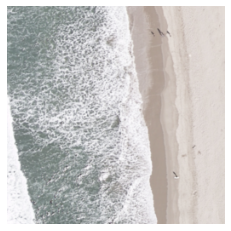

In [3]:
plt.imshow(imread('UCMerced_LandUse/UCMerced_LandUse/Images/beach/beach01.tif'))
plt.axis('off')
plt.show()

In [4]:
labels = os.listdir(source_dir)

In [5]:
pretrained_model = applications.InceptionV3(include_top=False, weights=None)
pretrained_model.trainable = True

In [6]:
image_data_generator = ImageDataGenerator(rescale=1/255.0)
image_generator = image_data_generator.flow_from_directory(source_dir,
                                                        batch_size=64,
                                                        shuffle=False
                                                        )
count = 0
X_batches, Y_batches = [], []
for X, Y in image_generator:
    X_batches.append(X)
    Y_batches.append(Y)
    count += X.shape[0]
    if count >= image_generator.n:
        break

x_data = np.concatenate(X_batches)
y_data = np.concatenate(Y_batches)

Found 2100 images belonging to 21 classes.


In [7]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size = 0.4, random_state=101)
x_test, x_val, y_test, y_val = train_test_split(x_val, y_val, test_size = 0.5, random_state=101)

In [8]:
inputs = pretrained_model.input
pooling_layer = GlobalAveragePooling2D()(pretrained_model.output)
drop_layer = Dropout(0.20)(pooling_layer)
x_layer = Dense(256, activation='relu')(drop_layer)
drop_layer1 = Dropout(0.5)(x_layer)
outputs = Dense(len(labels), activation='softmax')(drop_layer1)

model = Model(inputs=inputs, outputs=outputs)

In [9]:
adam = Adam(lr=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model_fit_history = model.fit(x_train, y_train, batch_size=64, epochs=80, verbose=2, validation_data=(x_val, y_val))

/home/csci8523/attan005/.local/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/80
20/20 - 80s - loss: 3.0192 - accuracy: 0.1437 - val_loss: 3.0506 - val_accuracy: 0.0405 - 80s/epoch - 4s/step
Epoch 2/80
20/20 - 67s - loss: 2.3705 - accuracy: 0.3048 - val_loss: 3.0781 - val_accuracy: 0.0405 - 67s/epoch - 3s/step
Epoch 3/80
20/20 - 65s - loss: 2.0253 - accuracy: 0.3675 - val_loss: 3.1290 - val_accuracy: 0.0429 - 65s/epoch - 3s/step
Epoch 4/80
20/20 - 64s - loss: 1.7278 - accuracy: 0.4683 - val_loss: 3.2165 - val_accuracy: 0.0429 - 64s/epoch - 3s/step
Epoch 5/80
20/20 - 65s - loss: 1.5063 - accuracy: 0.5286 - val_loss: 3.3481 - val_accuracy: 0.0405 - 65s/epoch - 3s/step
Epoch 6/80
20/20 - 64s - loss: 1.2544 - accuracy: 0.5881 - val_loss: 3.5475 - val_accuracy: 0.0405 - 64s/epoch - 3s/step
Epoch 7/80
20/20 - 65s - loss: 1.1172 - accuracy: 0.6437 - val_loss: 3.7206 - val_accuracy: 0.0429 - 65s/epoch - 3s/step
Epoch 8/80
20/20 - 64s - loss: 0.8959 - accuracy: 0.7143 - val_loss: 3.9392 - val_accuracy: 0.0476 - 64s/epoch - 3s/step
Epoch 9/80
20/20 - 64s - loss: 0

In [10]:
model.save_weights("uc_merced_final_1_t.h5")

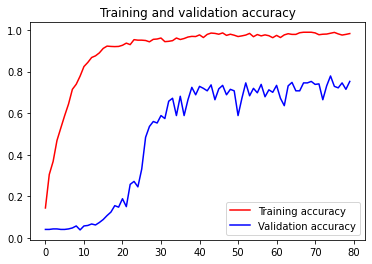

<Figure size 432x288 with 0 Axes>

In [11]:
accuracy = model_fit_history.history['accuracy']
val_accuracy = model_fit_history.history['val_accuracy']
loss = model_fit_history.history['loss']
val_loss = model_fit_history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

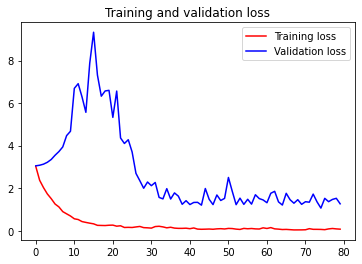

<Figure size 432x288 with 0 Axes>

In [12]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [13]:
y_pred = np.argmax(model.predict(x_test), axis=-1)

14/14 [==============================] - 4s 205ms/step


In [14]:
y_test = np.nonzero(y_test)[1]
accuracy = accuracy_score(y_test, y_pred)
print(f'Model predication accuracy: {accuracy:.3f}')
print(f'\nClassification report:\n {classification_report(y_test, y_pred)}')

Model predication accuracy: 0.714

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.54      0.96      0.69        23
           2       0.61      0.82      0.70        17
           3       0.88      0.94      0.91        16
           4       0.75      0.47      0.58        19
           5       1.00      0.94      0.97        18
           6       0.50      0.17      0.25        12
           7       0.92      1.00      0.96        24
           8       0.67      0.64      0.65        22
           9       0.82      0.75      0.78        24
          10       1.00      0.45      0.62        22
          11       0.42      0.88      0.57        16
          12       0.52      0.71      0.60        17
          13       0.76      0.83      0.79        23
          14       0.50      0.69      0.58        16
          15       0.92      0.82      0.87        28
          16       0.9